In this problem we need to predict two target which are correlated. you need to predict one target and use it as a feature to find the other target. If you get the first target wrong you will get second target wrong too. Thats why i spend most time trying to play with one target so i could get the most of it.

# view Data

In [107]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt

from datetime import datetime

In [108]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')


In [109]:
print("TEST DATA")
print(test.info())
print("="*50)
print("TRAIN DATA")
print(train.info())

TEST DATA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8072 entries, 0 to 8071
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pet_id        8072 non-null   object 
 1   issue_date    8072 non-null   object 
 2   listing_date  8072 non-null   object 
 3   condition     7453 non-null   float64
 4   color_type    8072 non-null   object 
 5   length(m)     8072 non-null   float64
 6   height(cm)    8072 non-null   float64
 7   X1            8072 non-null   int64  
 8   X2            8072 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 567.7+ KB
None
TRAIN DATA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pet_id          18834 non-null  object 
 1   issue_date      18834 non-null  object 
 2   listing_date    18834 non-null  objec

'breed_category' and 'pet_category' are our targets.

*   let's save them seperately
*   we will also need 'pet_id' from test.csv



In [110]:
targeted_breed_category = train['breed_category'].copy(deep=True)
targeted_pet_category = train['pet_category'].copy(deep=True)
test_pet_id = test['pet_id'].copy(deep=True)

## Missing Values
there are missing values in condition feature.
>
===>  Applying replace function to replace missing values by value 999

In [111]:
test['condition'] = train["condition"].replace(np.nan,999)
test['condition'] = test["condition"].replace(np.nan,999)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8072 entries, 0 to 8071
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pet_id        8072 non-null   object 
 1   issue_date    8072 non-null   object 
 2   listing_date  8072 non-null   object 
 3   condition     8072 non-null   float64
 4   color_type    8072 non-null   object 
 5   length(m)     8072 non-null   float64
 6   height(cm)    8072 non-null   float64
 7   X1            8072 non-null   int64  
 8   X2            8072 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 567.7+ KB


## Try Feature Generation

let's see correlation between our target and features 

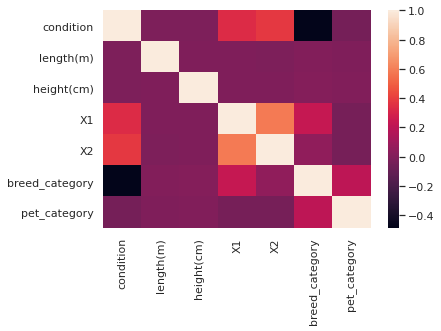

In [112]:
sea.heatmap(train.corr())

looks like our features don't have good correlation with targets.

we can try generating features with neumeric features like log transformation.

In [113]:
train['X1-X2'] = train['X1']-train['X2']
train['logX1+1'] = np.log(train['X1']+1)

# same for test
test['X1-X2'] = test['X1']-test['X2']
test['logX1+1'] = np.log(test['X1']+1)

# checking if the new log transformation have any missing values
print(test.info())

# correlation of new features with targets
train.corr()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8072 entries, 0 to 8071
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pet_id        8072 non-null   object 
 1   issue_date    8072 non-null   object 
 2   listing_date  8072 non-null   object 
 3   condition     8072 non-null   float64
 4   color_type    8072 non-null   object 
 5   length(m)     8072 non-null   float64
 6   height(cm)    8072 non-null   float64
 7   X1            8072 non-null   int64  
 8   X2            8072 non-null   int64  
 9   X1-X2         8072 non-null   int64  
 10  logX1+1       8072 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 693.8+ KB
None


,condition,length(m),height(cm),X1,X2,breed_category,pet_category,X1-X2,logX1+1
condition,1.000000,-0.011219,-0.010793,0.338843,0.381696,-0.483503,-0.041660,0.154121,0.308391
length(m),-0.011219,1.000000,-0.004464,-0.002893,-0.011175,0.007229,-0.003999,0.003800,-0.001371
height(cm),-0.010793,-0.004464,1.000000,-0.003801,-0.008216,0.011647,0.001976,0.000734,-0.003621
X1,0.338843,-0.002893,-0.003801,1.000000,0.584396,0.240729,-0.032594,0.845323,0.981863
X2,0.381696,-0.011175,-0.008216,0.584396,1.000000,0.052530,-0.032116,0.060471,0.546004
breed_category,-0.483503,0.007229,0.011647,0.240729,0.052530,1.000000,0.209230,0.261530,0.224877
pet_category,-0.041660,-0.003999,0.001976,-0.032594,-0.032116,0.209230,1.000000,-0.018948,-0.055431
X1-X2,0.154121,0.003800,0.000734,0.845323,0.060471,0.261530,-0.018948,1.000000,0.848289
logX1+1,0.308391,-0.001371,-0.003621,0.981863,0.546004,0.224877,-0.055431,0.848289,1.000000


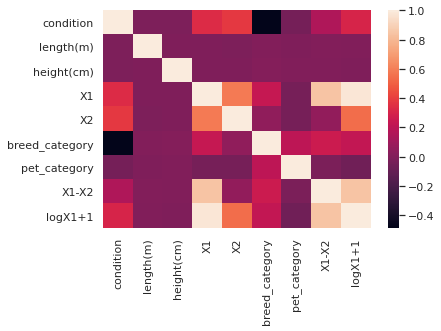

In [114]:
sea.heatmap(train.corr())

this new features are better in terms of breed_category

the issue_date and listing_date features are objects. lets convert them.

In [115]:
def convert_to_datetime(data):
  exit=[]
  issue=[]
  for i in range(len(data)):
    ext = datetime.strptime(data['listing_date'][i], '%Y-%m-%d %H:%M:%S')
    exit.append(ext.date())
  data['listing_date']=exit
  for i in range(len(data)):
    issu = datetime.strptime(data['issue_date'][i], '%Y-%m-%d %H:%M:%S')
    issue.append(issu.date())
  data['issue_date']=issue
  return data

In [116]:
train = convert_to_datetime(train)
test = convert_to_datetime(test)
train.head(2)

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,X1-X2,logX1+1
0,ANSL_69903,2016-07-10,2016-09-21,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,4,2.639057
1,ANSL_66892,2013-11-21,2018-12-27,1.0,White,0.72,14.19,13,9,0.0,2,4,2.639057


In [117]:
def get_Y_M_D(data):
  yearsin=[]
  monthsin=[]
  daysin=[]
  for i in range(len(data)):
    yrs=data['issue_date'][i].year
    yearsin.append(yrs)
    mon=data['issue_date'][i].month
    monthsin.append(mon)
    day_=data['issue_date'][i].day
    daysin.append(day_)
  data['issue-year'] = yearsin
  data['issue-month'] = monthsin
  data['issue-date'] = daysin  
  yearsin=[]
  monthsin=[]
  daysin=[]
  for i in range(len(data)):
    yrs=data['listing_date'][i].year
    yearsin.append(yrs)
    mon=data['listing_date'][i].month
    monthsin.append(mon)
    day_=data['listing_date'][i].day
    daysin.append(day_)
  data['listing-year'] = yearsin
  data['listing-month'] = monthsin
  data['listing-date'] = daysin
  return data  


In [118]:
train = get_Y_M_D(train)
test = get_Y_M_D(test)
train.head(2)

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category,X1-X2,logX1+1,issue-year,issue-month,issue-date,listing-year,listing-month,listing-date
0,ANSL_69903,2016-07-10,2016-09-21,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1,4,2.639057,2016,7,10,2016,9,21
1,ANSL_66892,2013-11-21,2018-12-27,1.0,White,0.72,14.19,13,9,0.0,2,4,2.639057,2013,11,21,2018,12,27


In [119]:
test.head(2)

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,X1-X2,logX1+1,issue-year,issue-month,issue-date,listing-year,listing-month,listing-date
0,ANSL_75005,2005-08-17,2017-09-07,2.0,Black,0.87,42.73,0,7,-7,0.0,2005,8,17,2017,9,7
1,ANSL_76663,2018-11-15,2019-05-08,1.0,Orange Tabby,0.06,6.71,0,1,-1,0.0,2018,11,15,2019,5,8


## one color one pet_category
through some hit and trial i found that some color have only 1 pet category and i stored there names in two list for category 1 and category 2

In [120]:
Tabby=['Black Tabby','Silver Tabby','Gray Tabby','Orange Tabby','Blue Tabby','Brown Tabby','Torbie','Silver Lynx Point','Blue Point','Lilac Point','Calico Point','Flame Point','Tortie Point','Seal Point','Chocolate Point','Blue Smoke','']
Tick=['Liver Tick','Liver','Red Tick','Blue Tick','Apricot','Blue Merle','Red Merle','Black Brindle','Yellow Brindle','']


In [121]:
# for train data
color = []
for c in train['color_type']:
  if c in Tabby:
    color.append(1)
  elif c in Tick:
    color.append(2)
  else:
    color.append(0)
train['color'] = color

# for test data
color = []
for c in test['color_type']:
  if c in Tabby:
    color.append(1)
  elif c in Tick:
    color.append(2)
  else:
    color.append(0)
test['color'] = color

# Data Visualization

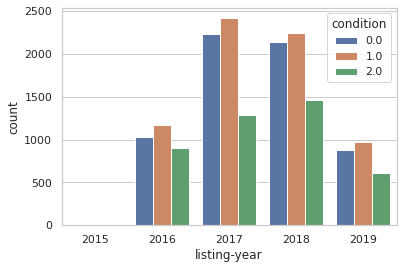

In [122]:
sea.countplot(x='listing-year', hue='condition',data=train)

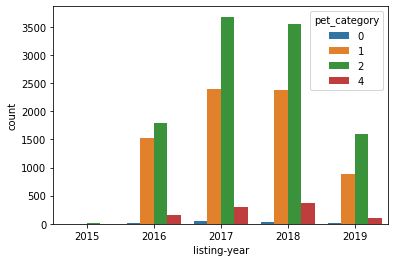

In [16]:
sea.countplot(x='listing-year', hue='pet_category',data=train)

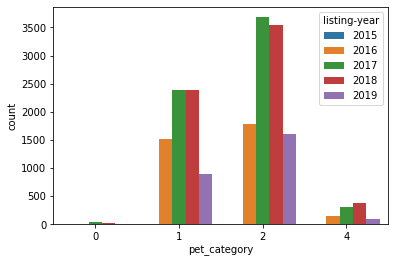

In [17]:
sea.countplot(x='pet_category', hue='listing-year',data=train)


1.   observation : 

> very less count of pet_category 0

>  very few count for year 2015








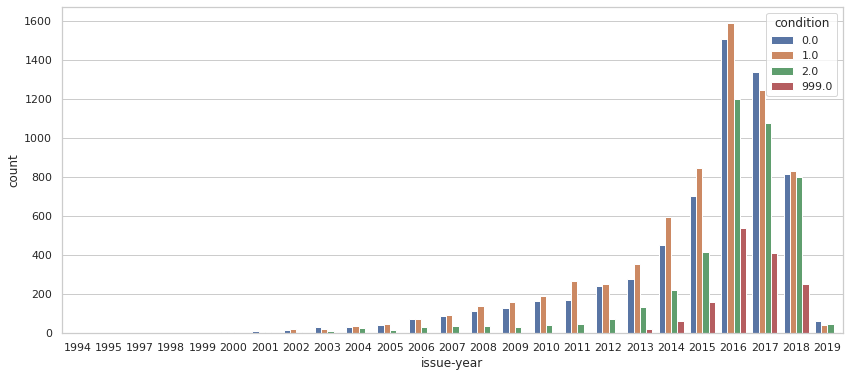

In [96]:
plt.figure(figsize=(14,6))
sea.countplot(x='issue-year', hue='condition',data=train)

## Listing year 2015

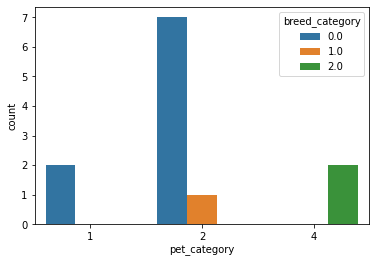

In [18]:
data_2015 = train[train['listing-year']==2015]
sea.countplot(x='pet_category', hue='breed_category',data=data_2015)

observation : no pet_category 0 in 2015

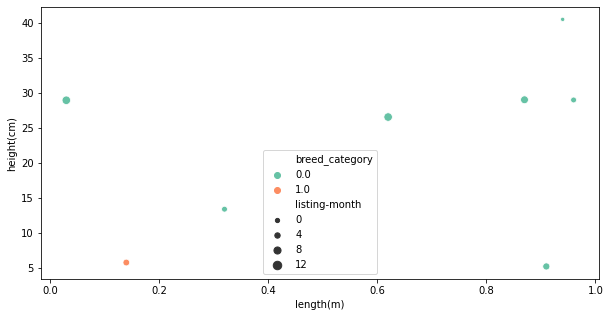

In [23]:
#sea.set(style='whitegrid')
plt.figure(figsize=(10,5))
sea.scatterplot(x='length(m)', y='height(cm)',hue='breed_category',palette="Set2",size='listing-month',sizes=(20,50) ,data=data_2015[data_2015['pet_category']==2])

this will help you visualize the breeds of pet_category 2 more accurately with ref to month of year.

## Pet category 0

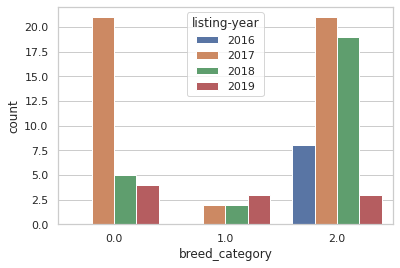

In [35]:
pet_category_0 = train[train['pet_category']==0]
sea.countplot(x='breed_category', hue='listing-year',data=pet_category_0)

Observation :

*   breed_category 1 has very low occurance

*   breed_category 2 is only listed in year 2016










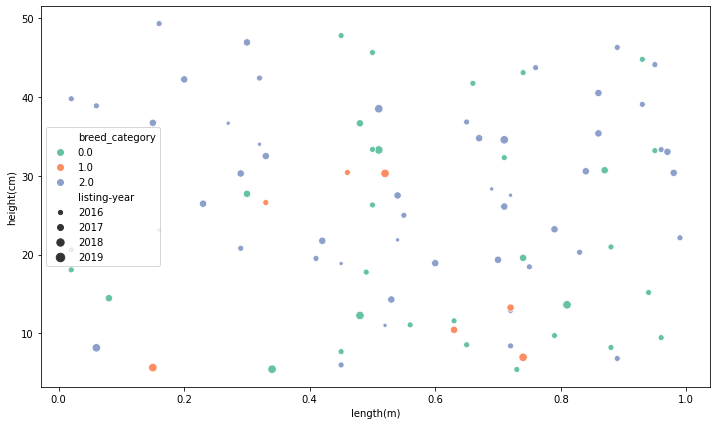

In [26]:
#sea.set(style='darkgrid')
plt.figure(figsize=(12,7))
sea.scatterplot(x='length(m)', y='height(cm)',hue='breed_category',palette="Set2",size='listing-year' ,data=pet_category_0)


you can see that pet category 0 breed 1 never go beyond specific height and length.



## Listing year 2019

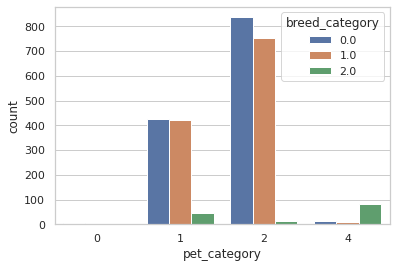

In [71]:
data_2019 = train[train['listing-year']==2019]
sea.countplot(x='pet_category', hue='breed_category',data=data_2019)

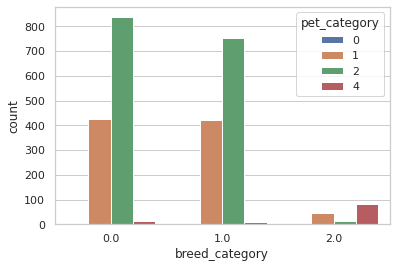

In [72]:
sea.countplot(x='breed_category', hue='pet_category',data=data_2019)

Observation :

*   It may look like pet category 0 is zero count but actual value is more as we can see it mentioned in legend.




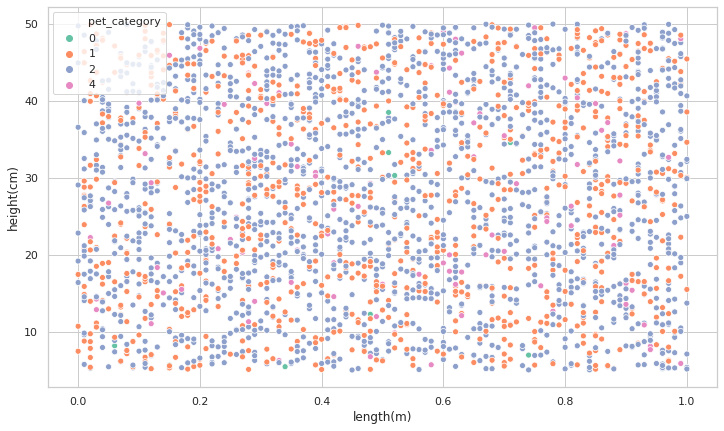

In [73]:
plt.figure(figsize=(12,7))
sea.scatterplot(x='length(m)', y='height(cm)',hue='pet_category',palette="Set2",sizes=(50,120) ,data=data_2019)

This scatterplot does not give any understandable information. Now count is increasing therefore we will not get much information.

$  we need to encode color_type in same coding. so we will join encode and split them then divide as feed and test.

In [125]:
datacolor0 = train[train['color']==0]
print(len(datacolor0))

15105


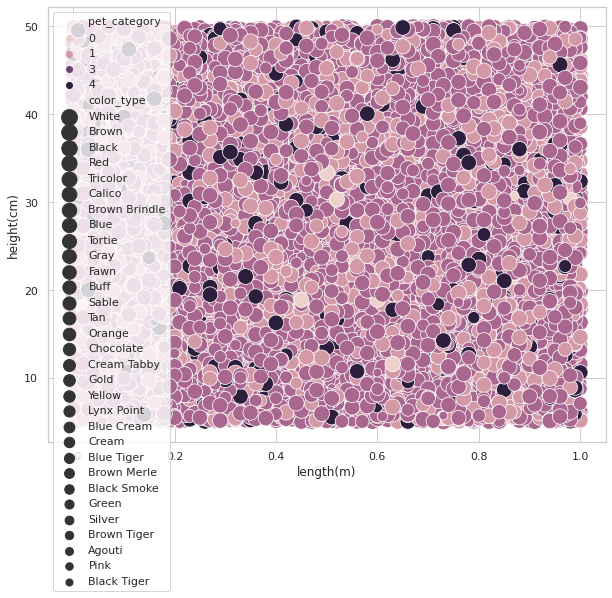

In [126]:
plt.figure(figsize=(10,8))
sea.scatterplot(x='length(m)', y='height(cm)',hue='pet_category',size='color_type',sizes=(50,250),data=datacolor0)

In [129]:
breed_feed = train.iloc[:,[3,7,11,12,19]]
breed_feed[:5]

,condition,X1,X1-X2,logX1+1,color
0,2.0,13,4,2.639057,1
1,1.0,13,4,2.639057,0
2,NaN,15,11,2.772589,0
3,1.0,0,-1,0.000000,0
4,2.0,18,14,2.944439,0


In [131]:
breed_test = test.iloc[:,[3,7,9,10,17]]
breed_test[:5]


,condition,X1,X1-X2,logX1+1,color
0,2.0,0,-7,0.000000,0
1,1.0,0,-1,0.000000,1
2,999.0,0,-7,0.000000,0
3,1.0,7,6,2.079442,0
4,2.0,0,-7,0.000000,0


#Viz.. Testing Data

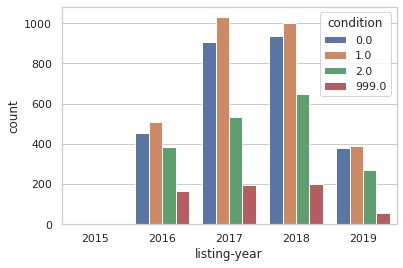

In [90]:
sea.countplot(x='listing-year', hue='condition',data=test)

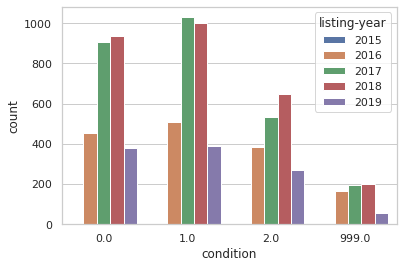

In [91]:
sea.countplot(x='condition', hue='listing-year',data=test)

listing year 2015 is intersting due to small sample data

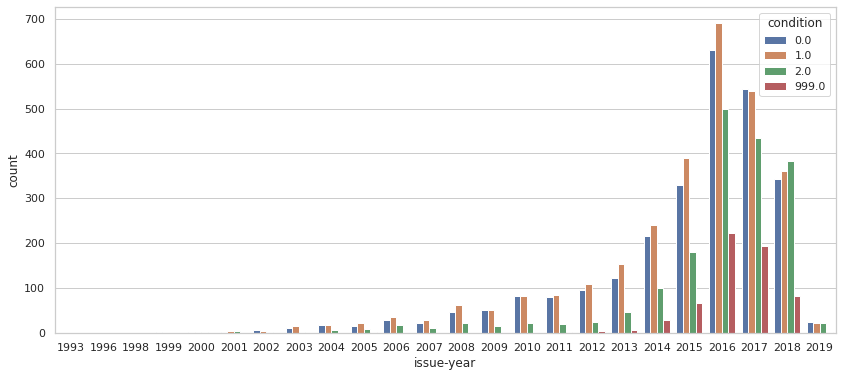

In [95]:
plt.figure(figsize=(14,6))
sea.countplot(x='issue-year', hue='condition',data=test)

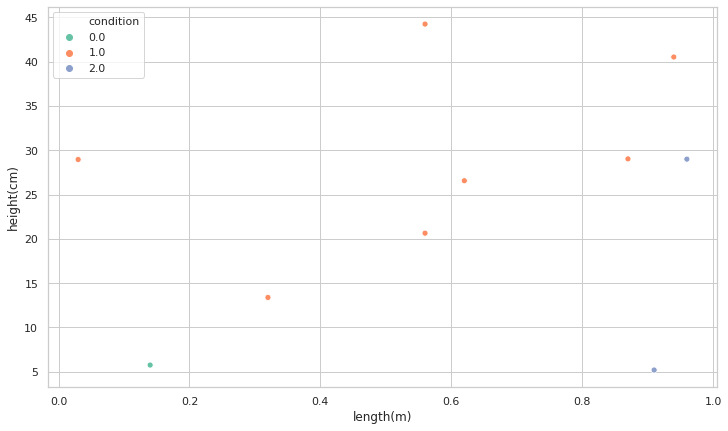

In [132]:
dataviz_2015 = train[train['listing-year']==2015]
plt.figure(figsize=(12,7))
sea.scatterplot(x='length(m)', y='height(cm)',hue='condition',palette="Set2" ,data=dataviz_2015)

In [133]:
from xgboost import XGBClassifier
model = XGBClassifier()

model.fit(breed_feed,targeted_breed_category)
XGBbreed = model.predict(breed_test)

In [135]:
pet_feed = breed_feed
pet_feed['breed_category'] = targeted_breed_category
pet_test = breed_test
pet_test['breed_category'] = XGBbreed

print(pet_feed.info())
print(pet_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   condition       17357 non-null  float64
 1   X1              18834 non-null  int64  
 2   X1-X2           18834 non-null  int64  
 3   logX1+1         18834 non-null  float64
 4   color           18834 non-null  int64  
 5   breed_category  18834 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 883.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8072 entries, 0 to 8071
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   condition       8072 non-null   float64
 1   X1              8072 non-null   int64  
 2   X1-X2           8072 non-null   int64  
 3   logX1+1         8072 non-null   float64
 4   color           8072 non-null   int64  
 5   breed_category  8072 non-null   float64
dtypes: f

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [136]:
petmodel = XGBClassifier()
petmodel.fit(pet_feed,targeted_pet_category)
XGBpet = petmodel.predict(pet_test)

save prediction

In [137]:
with open('submitpetadopt.csv','w') as f:
    f.write('pet_id,breed_category,pet_category\n')
    for i in range(len(test)):
        f.write(test_pet_id[i]+','+str(int(XGBbreed[i]))+','+str(int(XGBpet[i]))+'\n')